#### **PROBLEM STATEMENT**

Company's 2021-2025(feb) sales data to identify key revenues and progit drivers across products, channels, and regions, uncover seasonal trends and outliers, and align performance against budgets. Use these insights to optimise pricing, promotions and market expansions for sustaniable growth and reduced concentration risk.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
sheets = pd.read_excel('/content/Regional Sales Dataset.xlsx', sheet_name=None)

In [17]:
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2025 Budgets']

In [18]:
print("df_sales shape:",(df_sales.shape))
print("df_customers shape:",(df_customers.shape))
print("df_products shape:",(df_products.shape))
print("df_regions shape:",(df_regions.shape))
print("df_state_reg shape:",(df_state_reg.shape))
print("df_budgets shape:",(df_budgets.shape))

df_sales shape: (64104, 13)
df_customers shape: (175, 2)
df_products shape: (30, 2)
df_regions shape: (994, 15)
df_state_reg shape: (49, 3)
df_budgets shape: (30, 2)


In [19]:
df_sales.head(2)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Column1
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,NaN
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,NaN


In [20]:
df_customers.head(2)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group


In [21]:
df_products.head(2)

,Index,Product Name
0,1,Product 1
1,2,Product 2


In [22]:
df_regions.head(2)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago


In [23]:
df_state_reg.head(2)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South


In [24]:
new_header = df_state_reg.iloc[0].values.tolist()
df_state_reg = pd.DataFrame(df_state_reg.values[1:], columns=new_header)
df_state_reg.head(2)


,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South


In [25]:
df_budgets.head(2)

,Product Name,2025 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565


In [26]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [27]:
df_customers.isnull().sum()

,0
Customer Index,0
Customer Names,0


In [28]:
df_products.isnull().sum()

,0
Index,0
Product Name,0


In [29]:
df_regions.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [30]:
df_state_reg.isnull().sum()

,0
State Code,0
State,0
Region,0


In [31]:
df_budgets.isnull().sum()

,0
Product Name,0
2025 Budgets,0


#### **Data Cleaning and Data Wrangling**

In [32]:
# merge sales with customers
df = df_sales.merge(df_customers, how='left', left_on='Customer Name Index', right_on='Customer Index')

In [33]:
df.head(2)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Column1,Customer Index,Customer Names
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,NaN,126,Rhynoodle Ltd
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,NaN,96,Thoughtmix Ltd


In [34]:
#merge with products
df = df.merge(df_products, how='left', left_on='Product Description Index', right_on='Index')

In [35]:
df.head(2)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Column1,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,NaN,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,NaN,96,Thoughtmix Ltd,20,Product 20


In [36]:
#merge with regions
df = df.merge(df_regions, how='left', left_on='Delivery Region Index', right_on='id')

In [37]:
df.head(2)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis


In [38]:
print(df.columns.tolist())

['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel', 'Currency Code', 'Warehouse Code', 'Delivery Region Index', 'Product Description Index', 'Order Quantity', 'Unit Price', 'Line Total', 'Total Unit Cost', 'Column1', 'Customer Index', 'Customer Names', 'Index', 'Product Name', 'id', 'name', 'county', 'state_code', 'state', 'type', 'latitude', 'longitude', 'area_code', 'population', 'households', 'median_income', 'land_area', 'water_area', 'time_zone']


In [39]:
#merge with state regions
df = df.merge(df_state_reg[["State Code", "Region"]], how='left', left_on='state_code', right_on='State Code')

In [40]:
df.head(2)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest


In [41]:
#merge with  budgets
df = df.merge(df_budgets, how='left', on='Product Name')

In [42]:
df.to_csv('file.csv')

In [43]:
#Column1, id, State code, Customer Index
#remove redundant columns
cols_to_drop = ['Customer Index', 'Index', 'id', 'State Code','Column1']
df = df.drop(cols_to_drop, axis=1)

In [44]:
df.head(2)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2025 Budgets
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120


In [45]:
df.columns=df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2025 budgets'], dtype=object)

In [46]:
# delete not needed columns and just keep imp columns
cols_to_keep=[
    'ordernumber','orderdate','customer names','channel','product name','order quantity','unit price','line total','total unit cost','state_code',
    'county','state','region','latitude','longitude','2025 budgets'
]

In [47]:
df=df[cols_to_keep]

In [48]:
df.head(2)

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2025 budgets
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120


In [49]:
df=df.rename(columns={
    'ordernumber':'order_number',
    'orderdate':'order_date',
    'customer names':'customer_name',
    'product name':'product_name',
    'order quantity':'order_quantity',
    'unit price':'unit_price',
    'line total':'revenue',
    'state_code':'state',
    'latitude':'lat',
    'longitude':'long',
    'total unit cost':'cost',
    '2025 budgets':'budget'
})

In [50]:
#blank out budgets for non-2025 orders
df.loc[df['order_date'].dt.year !=2025,'budget']=pd.NA
df[['order_date','product_name','revenue','budget']].head(2)

,order_date,product_name,revenue,budget
0,2021-01-01,Product 27,14994.6,NaN
1,2021-01-01,Product 20,25868.7,NaN


In [51]:
df.to_csv('final.csv')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_number    64104 non-null  object        
 1   order_date      64104 non-null  datetime64[ns]
 2   customer_name   64104 non-null  object        
 3   channel         64104 non-null  object        
 4   product_name    64104 non-null  object        
 5   order_quantity  64104 non-null  int64         
 6   unit_price      64104 non-null  float64       
 7   revenue         64104 non-null  float64       
 8   cost            64104 non-null  float64       
 9   state           64104 non-null  object        
 10  county          64104 non-null  object        
 11  state           64104 non-null  object        
 12  region          64104 non-null  object        
 13  lat             64104 non-null  float64       
 14  long            64104 non-null  float64       
 15  bu

In [53]:
df_2025=df[df['order_date'].dt.year==2025]

In [54]:
df.isnull().sum()

,0
order_number,0
order_date,0
customer_name,0
channel,0
product_name,0
order_quantity,0
unit_price,0
revenue,0
cost,0
state,0


In [55]:
df_2025.head(2)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state,county,state,region,lat,long,budget
61626,SO - 0001442,2025-01-01,Skajo Ltd,Export,Product 13,7,5902.7,41318.9,3541.62,OR,Washington County,Oregon,West,45.49428,-122.86705,3720639.645
61627,SO - 0003288,2025-01-01,Tagfeed Ltd,Wholesale,Product 25,10,1045.2,10452.0,731.64,GA,Richmond County,Georgia,South,33.36149,-82.07500,5342315.484


In [56]:
df['order_date'] = pd.to_datetime(df['order_date'])

df['order_month_num'] = df['order_date'].dt.month
df['order_month_name'] = df['order_date'].dt.strftime('%B')

#### **Feature Engineering**

In [57]:
df['total_cost'] = df['order_quantity']*df['cost']

In [58]:
df['profit'] = df['revenue']-df['total_cost']
df['profit_margin_pct']=df['profit']/df['revenue']*100

In [59]:
df.head(2)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state,...,state,region,lat,long,budget,order_month_num,order_month_name,total_cost,profit,profit_margin_pct
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,Georgia,South,32.08354,-81.09983,NaN,1,January,10946.058,4048.542,27.0
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Indiana,Midwest,39.61366,-86.10665,NaN,1,January,13969.098,11899.602,46.0


#### **Exploratory Data Analysis(EDA)**

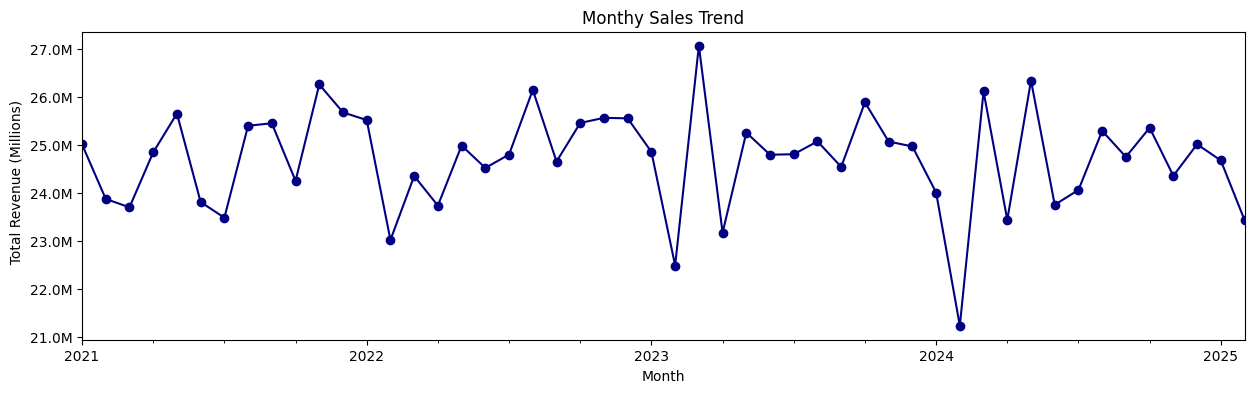

In [60]:
df['order_month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('order_month')['revenue'].sum()
plt.figure(figsize=(15,4))
monthly_sales.plot(marker='o',color='navy')

from matplotlib.ticker import FuncFormatter
formatter=FuncFormatter(lambda x,pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthy Sales Trend')
plt.xlabel('Month')
plt.ylabel('  Total Revenue (Millions)')
plt.show()

**Insight**

Monthly revenue ranges from 21M to 27M, with clear seasonal ups and downs. No strong overall growth trend, but early 2023 had peak sales and early 2024 saw a dip. Revenue stabilizes somewhat in 2024, showing steady business performance despite some volatility.

---



In [61]:
df['order_date'] = pd.to_datetime(df['order_date'])
df_new =df[~((df['order_date'].dt.year==2025) & (df['order_date'].dt.month.isin([1,2])))]

/tmp/ipython-input-1813367598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['order_date'] = pd.to_datetime(df['order_date'])
/tmp/ipython-input-1813367598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month'] = df_new['order_date'].dt.strftime('%B')


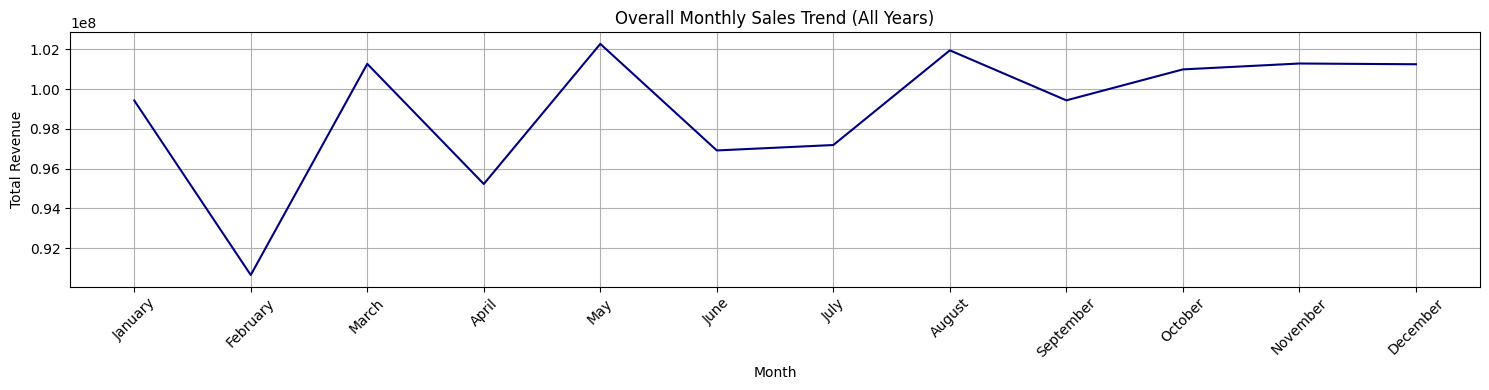

In [62]:
df_new['order_date'] = pd.to_datetime(df['order_date'])
df_new['month'] = df_new['order_date'].dt.strftime('%B')
monthly_trend = df_new.groupby('month')['revenue'].sum().reset_index()
#monthly sales for all years
month_order=['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_trend['month']=pd.Categorical(monthly_trend['month'],categories=month_order,ordered=True)
monthly_trend=monthly_trend.sort_values('month')

plt.figure(figsize=(15,4))
sns.lineplot(data=monthly_trend,x='month',y='revenue',color='navy')
plt.title('Overall Monthly Sales Trend (All Years)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight**

The overall monthly sales trend shows that total revenue remains relatively stable throughout the year, generally fluctuating just above 98 million. There are noticeable dips in February and April, followed by strong recoveries in March, May, and August—these months hit the highest revenue points.

---



/tmp/ipython-input-2363606392.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='tab10')


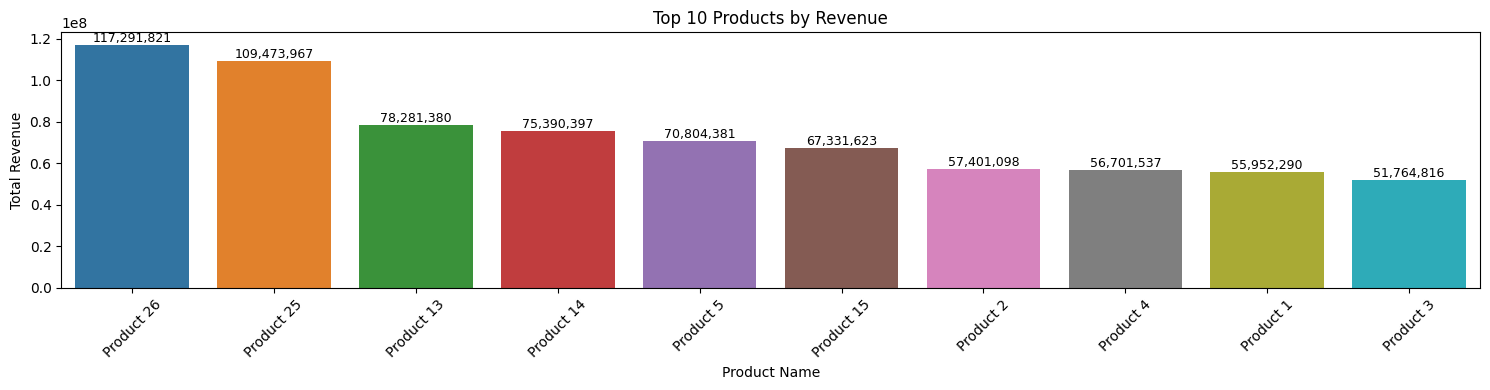

In [63]:
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()
#get top 10 products by revenue
top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)

plt.figure(figsize=(15, 4))
ax = sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='tab10')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black')

plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insight**

Product 26 and Product 25 are the clear top performers, generating significantly higher revenue (117M and 109M, respectively) than the rest of the products.

---



/tmp/ipython-input-3022666435.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=bottom_10_products, x='product_name', y='revenue', palette='pastel')


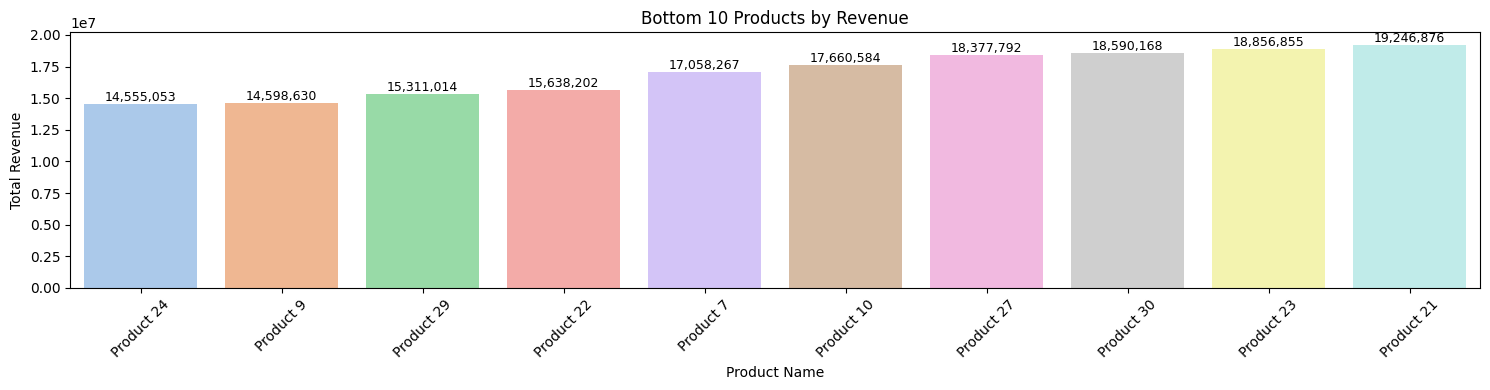

In [64]:
#Bottom 10 products by revenue
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()
bottom_10_products = product_revenue.sort_values(by='revenue', ascending=True).head(10)

plt.figure(figsize=(15, 4))
ax = sns.barplot(data=bottom_10_products, x='product_name', y='revenue', palette='pastel')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black')

plt.title('Bottom 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insight**
The bottom 10 products each generate significantly less revenue compared to the company's top performers, with total revenues ranging from approximately 14.6 million to 19.2 million. Even among these lower performers, the gap between the lowest (Product 24 at 14.6M) and the highest (Product 21 at 19.2M) is relatively moderate, suggesting consistency at the lower end of the product portfolio.

---



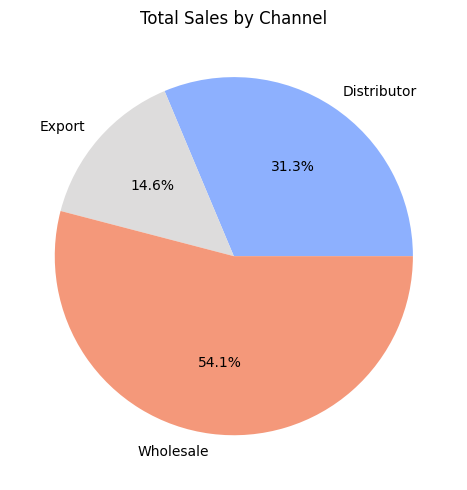

In [65]:
# Total sales by channel
chan_sales = df.groupby('channel')['revenue'].sum().reset_index()

plt.figure(figsize=(5, 5))
plt.pie(
    chan_sales['revenue'],
    labels=chan_sales['channel'],
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm', len(chan_sales))
)
plt.title('Total Sales by Channel')
plt.tight_layout()
plt.show()

**Insight**
Wholesale is the dominant sales channel, contributing over half (54.1%) of total sales. Distributors account for nearly a third (31.3%), while Export represents the smallest share (14.6%). This indicates that the company's revenue is heavily reliant on Wholesale, making it a key driver of business performance.

---



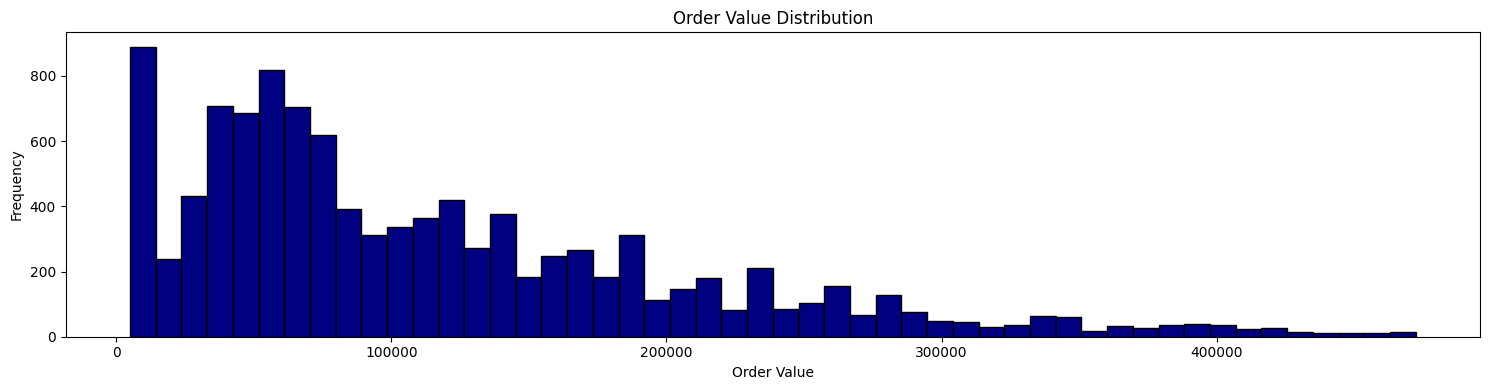

Average Order Value: 115684.10


In [66]:
# Average Order Distribution
order_totals = df.groupby('order_number')['revenue'].sum()

plt.figure(figsize=(15, 4))
plt.hist(
    order_totals,
    bins=50,
    color='navy',
    edgecolor='black'
)
plt.title('Order Value Distribution')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print(f"Average Order Value: {order_totals.mean():.2f}")


**Insight**
The distribution of order values is highly right-skewed, indicating that most orders are for lower values, predominantly clustered below 100,000. There are a significant number of small orders, with frequency sharply dropping as order value increases.

---



/tmp/ipython-input-3583247815.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='product_name', y='unit_price', palette='tab10')


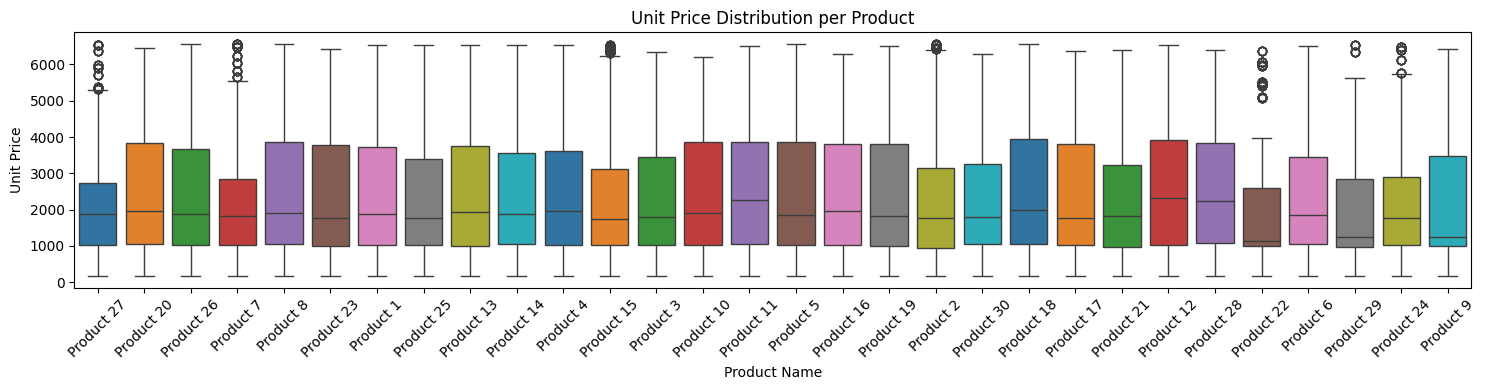

In [67]:
#Unit Price Distribution per product
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x='product_name', y='unit_price', palette='tab10')
plt.title('Unit Price Distribution per Product')
plt.xlabel('Product Name')
plt.ylabel('Unit Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insight**

Unit prices vary widely across products, with some showing high variability and notable high-price outliers. This suggests opportunities to refine pricing strategies by understanding and managing these price differences and outliers.

/tmp/ipython-input-566636082.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_revenue, x='state.1', y='revenue', palette='viridis')
/tmp/ipython-input-566636082.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_orders, x='state.1', y='order_count', palette='rocket')


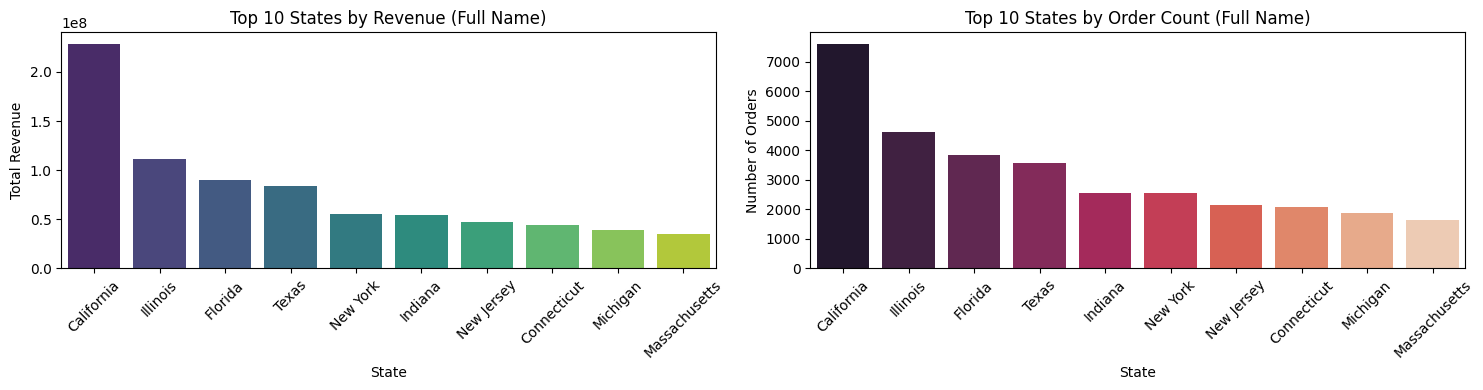

In [68]:
#Top 10 States by Revenue and Order Count
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def deduplicate_columns(columns):
    counter = Counter()
    new_columns = []
    for col in columns:
        if counter[col]:
            new_columns.append(f"{col}.{counter[col]}")
        else:
            new_columns.append(col)
        counter[col] += 1
    return new_columns

df.columns = deduplicate_columns(df.columns)

state_revenue = df.groupby('state.1')['revenue'].sum().reset_index()
top10_revenue = state_revenue.sort_values(by='revenue', ascending=False).head(10)

state_orders = df.groupby('state.1')['order_number'].nunique().reset_index(name='order_count')
top10_orders = state_orders.sort_values(by='order_count', ascending=False).head(10)

plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.barplot(data=top10_revenue, x='state.1', y='revenue', palette='viridis')
plt.title('Top 10 States by Revenue (Full Name)')
plt.xlabel('State')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=top10_orders, x='state.1', y='order_count', palette='rocket')
plt.title('Top 10 States by Order Count (Full Name)')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Insight**

California leads significantly in both revenue and orders, followed by Illinois and Florida. The company’s sales are concentrated in a few key states, suggesting opportunities to expand in strong markets and grow in lower-performing regions for better diversification.

---



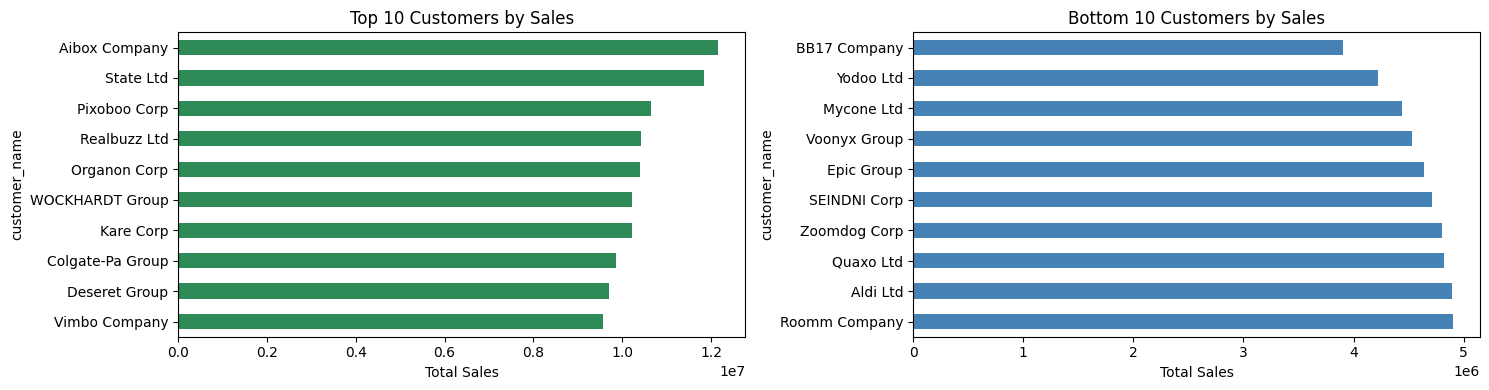

In [69]:
customer_sales = df_new.groupby('customer_name')['revenue'].sum()

# Get top and bottom 10
top_10_customers = customer_sales.sort_values(ascending=False).head(10)
bottom_10_customers = customer_sales.sort_values().head(10)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))
top_10_customers.plot(kind='barh', color='seagreen', ax=axes[0])
axes[0].set_title('Top 10 Customers by Sales')
axes[0].set_xlabel('Total Sales')
axes[0].invert_yaxis()
bottom_10_customers.plot(kind='barh', color='steelblue', ax=axes[1])
axes[1].set_title('Bottom 10 Customers by Sales')
axes[1].set_xlabel('Total Sales')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

**Insight**

Sales are heavily concentrated among the top 10 customers, each contributing between roughly 9M and 12M+ in total sales. The leading customer, Aibox Company, is notably ahead of others. In contrast, the bottom 10 customers collectively generate less than half the sales of the top-tier customers, with each contributing about 4M to 5M.

---



In [70]:
print(df_new.columns)

Index(['order_number', 'order_date', 'customer_name', 'channel',
       'product_name', 'order_quantity', 'unit_price', 'revenue', 'cost',
       'state', 'county', 'state', 'region', 'lat', 'long', 'budget',
       'order_month_num', 'order_month_name', 'total_cost', 'profit',
       'profit_margin_pct', 'order_month', 'month'],
      dtype='object')


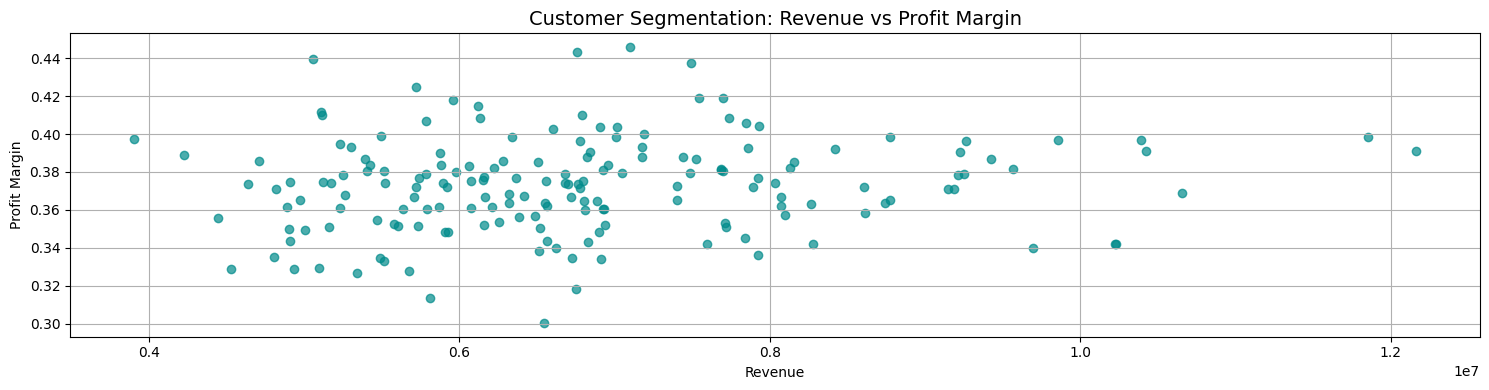

In [71]:
#Customer Segmentation-Revenue vs Profit Margin
customer_seg = df_new.groupby('customer_name').agg({
    'revenue': 'sum',
    'profit': 'sum'
}).reset_index()

customer_seg['Profit Margin'] = customer_seg['profit'] / customer_seg['revenue']
plt.figure(figsize=(15, 4))
plt.scatter(customer_seg['revenue'], customer_seg['Profit Margin'], color='darkcyan', alpha=0.7)
plt.title('Customer Segmentation: Revenue vs Profit Margin', fontsize=14)
plt.xlabel('Revenue')
plt.ylabel('Profit Margin')
plt.grid(True)
plt.tight_layout()
plt.show()

median_revenue = customer_seg['revenue'].median()

customer_seg['Segment'] = customer_seg.apply(lambda row:
    'Premium' if row['revenue'] > median_revenue and row['Profit Margin'] > 0.2 else
    'Volume-Based' if row['revenue'] > median_revenue else
    'Niche' if row['Profit Margin'] > 0.2 else
    'Low-Value', axis=1)



**Insight**

Customer revenue varies widely, but profit margins remain fairly consistent across customers. There’s no strong link between revenue size and profitability, indicating stable margins regardless of customer scale.

---



In [72]:
df_new.to_csv("final_sales_data.csv")

#### **EDA Insights Summary**

###### 1. Monthly Sales Trend
- **Revenue Range:** Monthly revenue fluctuates between 21M and 27M.
- **Highest and Lowest:** Peak revenue just under 27M (early 2023); low near 21M (early 2024).
- **Stability:** Revenue mostly above 23M; shows seasonal peaks and dips.
- **2024:** Revenue stabilizes more but still somewhat volatile.

###### 2. Yearly Revenue Pattern
- Revenue averages around 98M monthly.
- February and April saw dips; March, May, and August had strong rebounds.
- Revenue stabilizes higher and steadier after September through December.

###### 3. Top 10 Products by Revenue

| Product    | Approximate Revenue (M) |
|------------|------------------------|
| Product 26 | 117                    |
| Product 25 | 109                    |
| Product 13 | 78                     |
| Product 14 | 75                     |
| Others     | 51 - 71                |

- Top 2 products dominate revenue.
- Focus on sustaining these plus growing mid-tier products.

###### 4. Bottom 10 Products by Revenue

| Product    | Approximate Revenue (M) |
|------------|------------------------|
| Product 21 | 19.2                   |
| ...        | ...                    |
| Product 24 | 14.6                   |

- Lower-performing products show consistent but small revenue.
- Consider marketing or product strategy revisions here.

###### 5. Sales by Channel

| Channel     | Share of Total Sales (%) |
|-------------|--------------------------|
| Wholesale   | 54.1                     |
| Distributor | 31.3                     |
| Export      | 14.6                     |

- Wholesale is the dominant channel.
- Export presents international growth opportunities.

###### 6. Order Value Distribution
- Most orders are low-value, under 100,000.
- High-value orders (>200,000) are rare but impactful.

###### 7. Unit Price Distribution per Product
- Wide price variability; certain products (27, 20, 17) have high-priced outliers.
- Pricing strategy could be optimized by analyzing these trends.

###### 8. Top States by Revenue and Orders
- **Leaders:** California, Illinois, Florida.
- Strong concentration in a few states; opportunity for growth in others.

###### 9. Customer Sales Distribution
- Top 10 customers contribute 9M–12M+ each; leading customer far ahead.
- Bottom 10 contribute 4M–5M each.
- Diversification opportunities exist by growing smaller accounts.

###### 10. Customer Segmentation: Revenue vs Profit Margin
- Profit margins stable across customers (0.91–0.94), no strong correlation to revenue size.
- Stable margins imply consistent pricing and cost across customer base.

---

**Overall Summary:**  
The company's revenue is concentrated in key products, customers, states, and sales channels with a generally stable monthly revenue base around or above 23M. Seasonal fluctuations and variability in order values exist but the business shows resilience. Strategic focus can target export growth, mid-tier products, smaller customers, and underperforming states/products for further optimization.

